In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def show(img):
    rgb =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap='gray')

In [36]:
def get_a(a = 9):
    print(f'gia tri cua a:{a}')
    
get_a(a = 1000)

gia tri cua a:1000


height: 775
width: 1000
chanel: 3


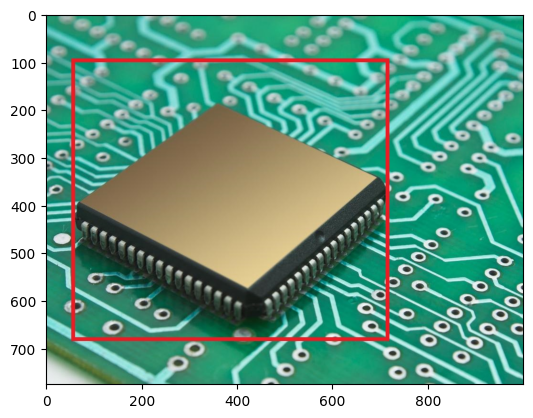

In [68]:
img = cv2.imread("images/chip.jpg")
img.shape
print(f'height: {img.shape[0]}')
print(f'width: {img.shape[1]}')
print(f'chanel: {img.shape[2]}')
show(img)

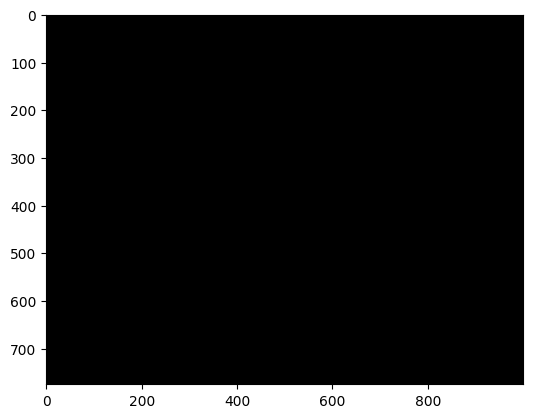

In [18]:
height = img.shape[0]
width = img.shape[1]
hsv_space = np.zeros((height,width,3),dtype=np.uint8)
plt.imshow(hsv_space,cmap ='gray')

In [19]:
print(max(2,3,45,561,6))
print(min(2,3,45,561,6))

561
2


In [ ]:
for y in range(height):
    for x in range(width):
        
        B = img[y,x][0] /255.0
        G = img[y,x][1] /255.0
        R = img[y,x][2] /255.0
        
        max_value = max(B,G,R)
        min_value = min(B,G,R)
        
        # Calculate V
        v_value = max_value
        # Calculate S
        if v_value !=0:
            s_value = (v_value - min_value) / v_value
        else: 
            s_value =0
        
        # Calculate
        if G==R==B:
            h_value = 0   
            
        elif max_value == R:
            h_value = int(60* (G-B) / (v_value - min_value))
            
        elif max_value == G:
            h_value = 120 + int(60* (B-R) / (v_value - min_value))
            
        elif max_value == B:
            h_value = 240+ int(60* (R-G) / (v_value - min_value))

        # Ouput
        if h_value  < 0:
            h_value = h_value +360
        
        hsv_space[y, x] = [int(h_value /2) , int(s_value*255.0), int(v_value*255.0)]
  
hsv_space.astype(np.uint8)     

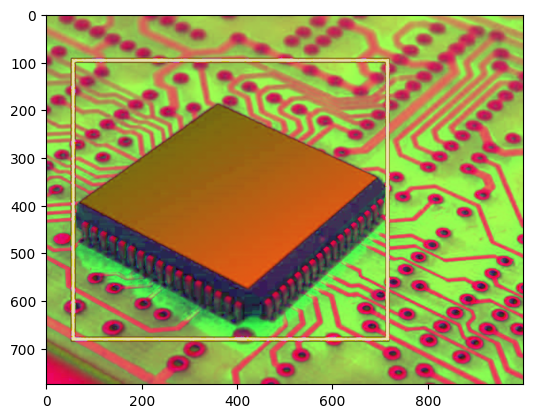

In [24]:
show(hsv_space)

In [56]:
print(np.min(hsv_space[:,:,2]))

5


# Extract color

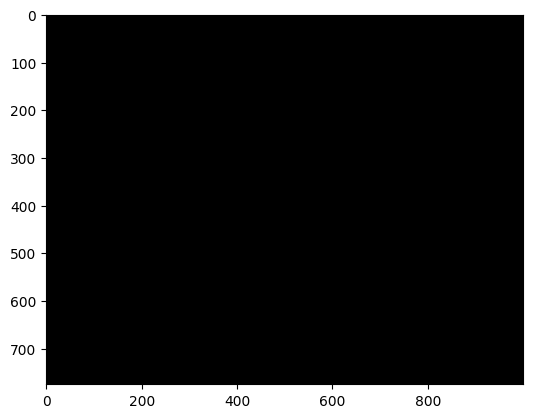

In [14]:
color_space = np.zeros((height,width,3),dtype=np.uint8)
plt.imshow(color_space,cmap='gray')

In [15]:
for y in range(height):
    for x in range(width):
        
        h_value = hsv_space[y,x][0]
        s_value = hsv_space[y,x][1]
        v_value = hsv_space[y,x][2]
        
        if h_value >= 0 and h_value <= 38:
            if s_value >= 53 and s_value <=121 :
                if v_value >= 105 and v_value <=255 :
                    
                    color_space[y,x][0] = img[y,x][0]
                    
                    color_space[y,x][1] = img[y,x][1]
                    
                    color_space[y,x][2] = img[y,x][2]
                    
        

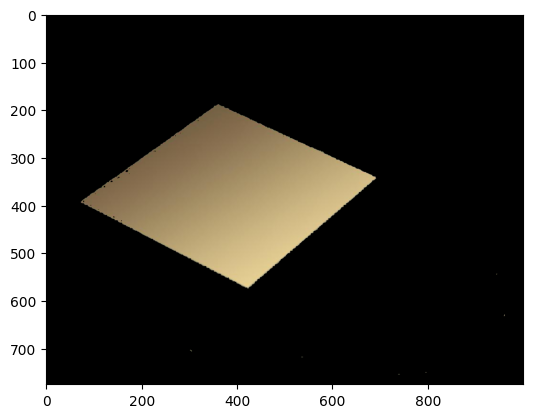

In [16]:
show(color_space)

# Opencv

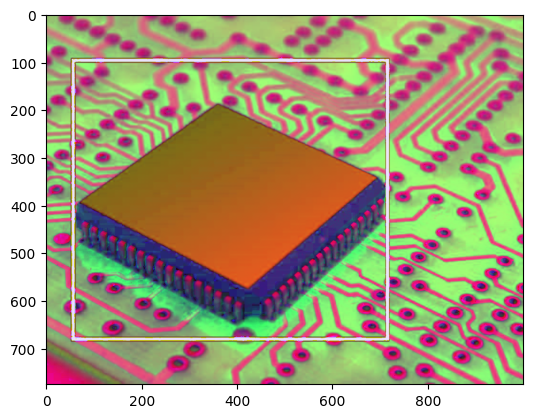

In [25]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
show(hsv)

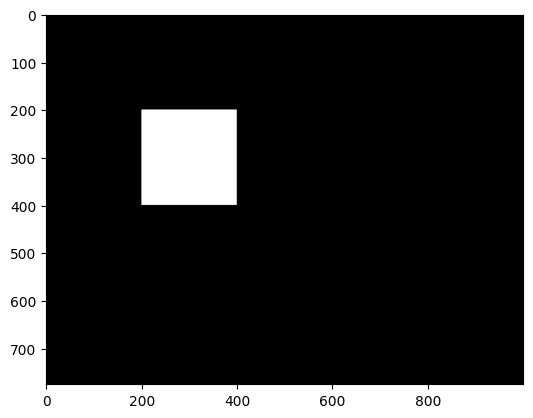

In [60]:
mask_cus = np.zeros((img.shape[0],img.shape[1]) ,dtype=np.uint8)
mask_cus[200:400 , 200:400]= [255]

show(mask_cus.astype(np.uint8))

(775, 1000)


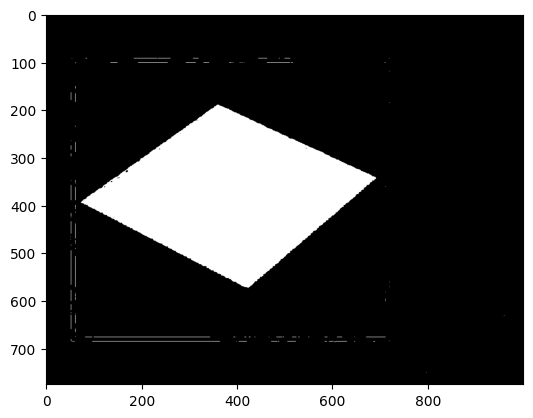

In [67]:
hsv_low = np.array([1, 53, 105], np.uint8)
hsv_high = np.array([38, 121, 255], np.uint8)

#making mask for hsv range
mask = cv2.inRange(hsv, hsv_low, hsv_high)
print(mask.shape)
show(mask)

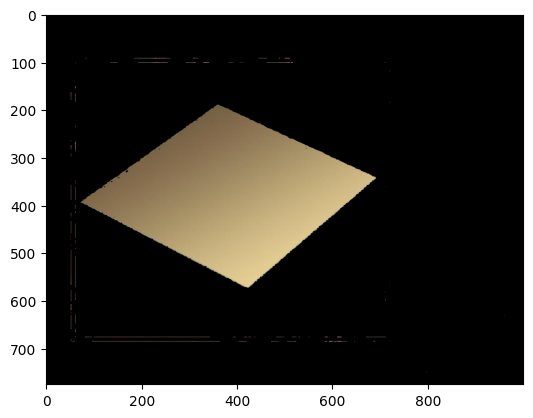

In [65]:
res  = cv2.bitwise_and(img, img, mask = mask)
show(res)

# Bitwise Operation

1. Bitwise_and
2. Bitwise_or
3. Bitwise_xor
4. Bitwise_not

(600, 800)


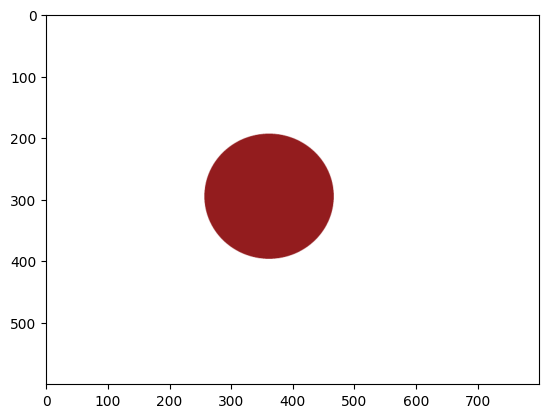

In [42]:
img1 = cv2.imread("images/redC.png")
gray =cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
print(gray.shape)
show(img1)

(600, 800)


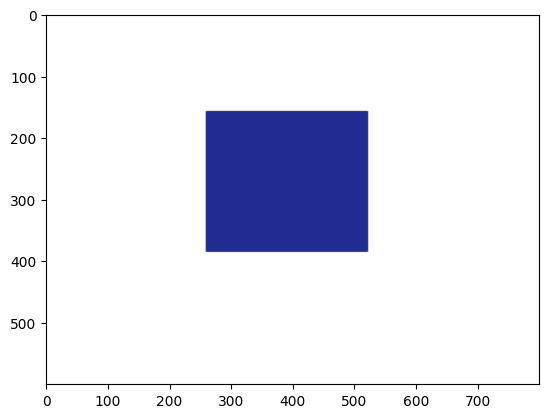

In [40]:
img2 = cv2.imread("images/blueR.png")
gray =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY )
print(gray.shape)
show(img2)

[18 12  2]
[ 30  28 147]
[147  45  34]


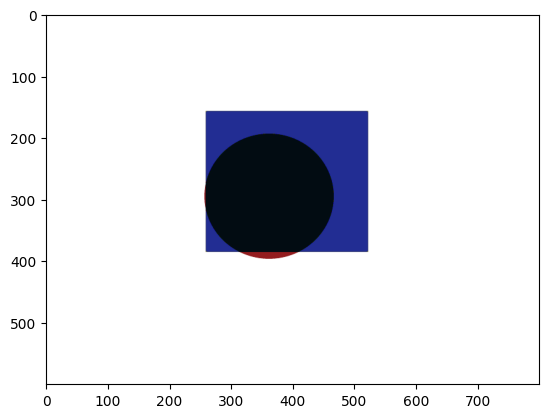

In [45]:
bitwise_and = cv2.bitwise_and(img1, img2,mask=None)
show(bitwise_and)

print(bitwise_and[300,350])
print(img1[300,350])
print(img2[300,350])

# Thresholding

(775, 1000)


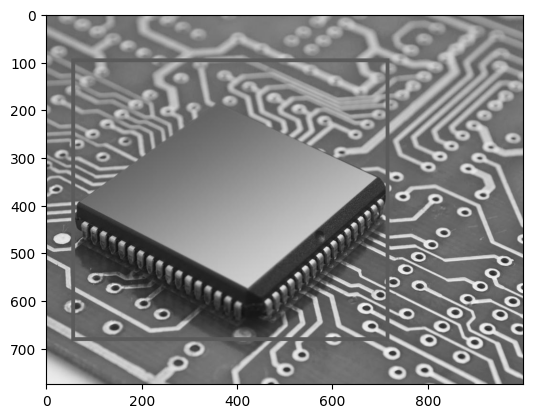

In [70]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)
print(gray.shape)

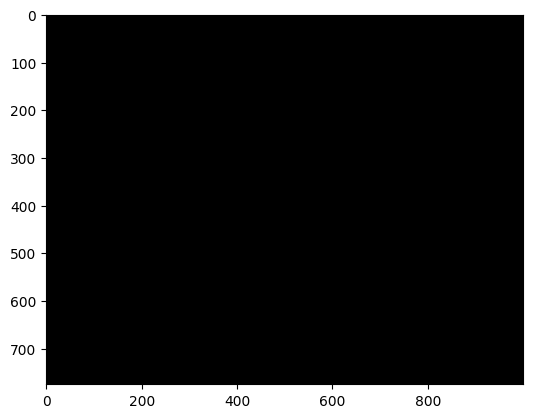

In [71]:
T  = 150 
threshold_space = np.zeros((gray.shape),dtype=np.uint8)
show(threshold_space)

# BINARY

In [80]:
for y in range(height):
    for x in range(width):
        if gray[y,x] >=T:
            threshold_space[y,x] = 255
        else:
            threshold_space[y,x] = 0

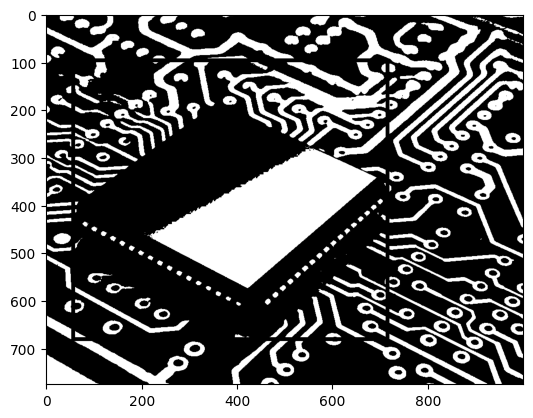

In [81]:
show(threshold_space)

# BINARY_INV

In [82]:
threshold_space_inv = np.zeros((gray.shape),dtype=np.uint8)
for y in range(height):
    for x in range(width):
        if gray[y,x] >=T:
            threshold_space_inv[y,x] = 0
        else:
            threshold_space_inv[y,x] = 255

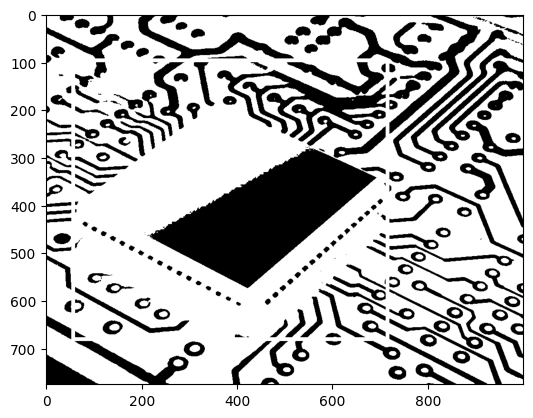

In [83]:
show(threshold_space_inv)

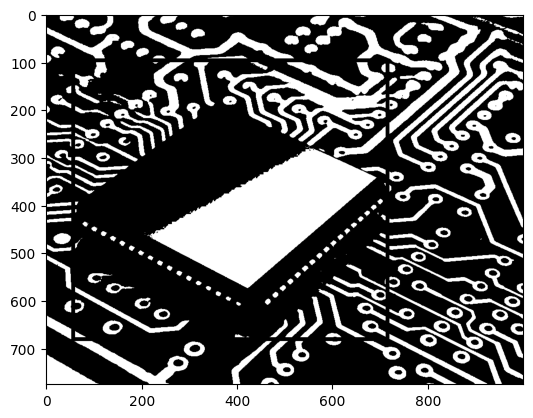

In [84]:
inv = cv2.bitwise_not(threshold_space_inv)
show(inv)

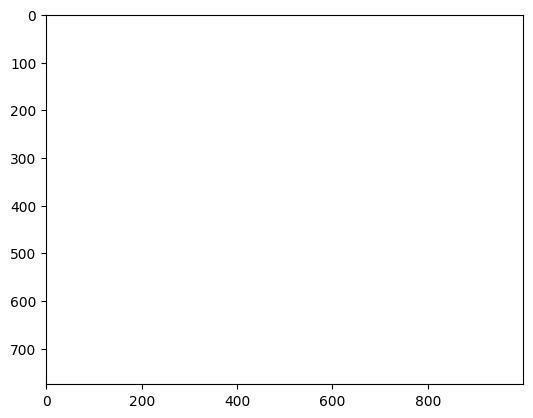

In [85]:
bitwise_or = cv2.bitwise_or(threshold_space_inv,inv)
show(bitwise_or)

# Threshold Opencv

* Global threshold 
* Adaptive Thresholdold (edge) (c)
* Binary threshold (automation T histogram)

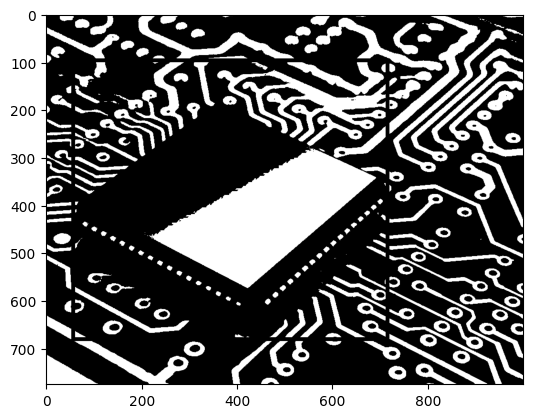

In [90]:
_ ,threshold = cv2.threshold(gray, T,255, cv2.THRESH_BINARY)
_ ,threshold_inv = cv2.threshold(gray, T,255, cv2.THRESH_BINARY_INV)
show(threshold)

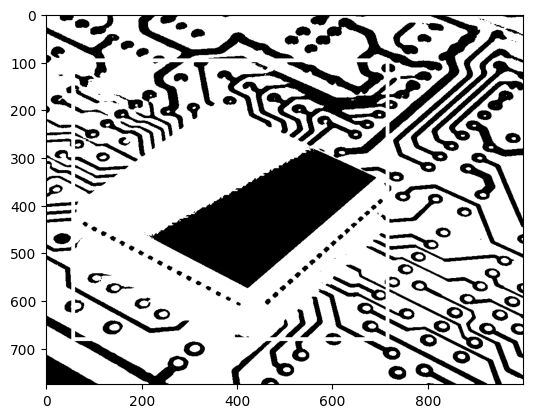

In [89]:
show(threshold_inv)

# Thresold Range (a ,b)
(120,200)

In [ ]:
def threshold_range_0 (gray, T1, T2):
    threshold_range_space = np.zeros((gray.shape[0],gray.shape[1]),dtype= np.uint8)
    for y in range(height):
        for x in range(width):
            if gray[y,x] > T1 and gray[y,x] <T2:
                threshold_range_space[y,x] = 255
                
    return threshold_range_space
           
th_range = threshold_range_0

In [91]:
def threshold_range(img, T1, T2):
    _,th1 = cv2.threshold(img, T1,255, cv2.THRESH_BINARY_INV)
    _,th2 = cv2.threshold(img, T2,255, cv2.THRESH_BINARY_INV)
    
    th_range = cv2.bitwise_xor(th1,th2)
    
    return th_range

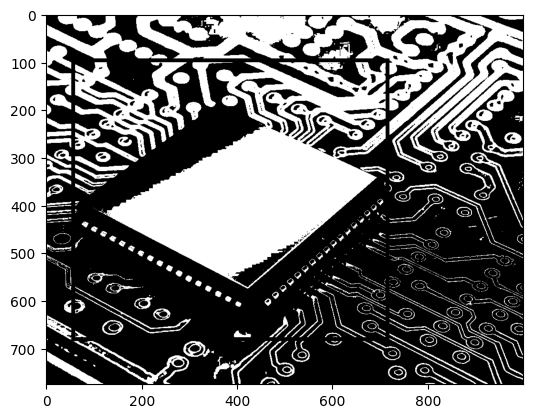

In [92]:
th_range = threshold_range(gray,120,200 )
show(th_range)